  34 Quantifying credit risk in peer-to-peer
lending using Machine Learning.


CHETHANA KR PES2UG23CS151

NIKHIL G PES2UG23CS195

In [ ]:
# ============================================
# P2P LENDING CREDIT RISK ANALYSIS - COLAB
# ============================================

# Step 1: Install libraries
!pip install -q pandas numpy scikit-learn matplotlib seaborn

# Step 2: Upload your file
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("UPLOAD YOUR LENDING DATA FILE")
print("="*60)
print("Supported formats: .csv, .csv.gz")
print("\n")

uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 3: Load and process
print("\nLoading data...")
df = pd.read_csv(filename, low_memory=False)
print(f"✓ Loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")

# Step 4: Quick analysis
print("\n" + "="*60)
print("DATASET INFO")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("FIRST FEW ROWS")
print("="*60)
print(df.head())

# Step 5: Show available columns for user to identify target
print("\n" + "="*60)
print("AVAILABLE COLUMNS")
print("="*60)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("\n✓ Data loaded successfully!")
print("✓ Now you can proceed with the credit risk analysis")

UPLOAD YOUR LENDING DATA FILE
Supported formats: .csv, .csv.gz




Saving prosperLoanData.csv.zip to prosperLoanData.csv (1).zip

Loading data...
✓ Loaded: 113,937 rows, 81 columns

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield        

Installing required packages...
✓ Libraries imported successfully!

STEP 1: UPLOAD YOUR LENDING DATA
Please upload your CSV or CSV.GZ file



Saving prosperLoanData.csv.zip to prosperLoanData.csv (4).zip

✓ File uploaded: prosperLoanData.csv (4).zip
Loading data...
✓ Data loaded: 113,937 rows, 81 columns

STEP 2: DATA EXPLORATION

📊 Dataset Overview:
   Rows: 113,937
   Columns: 81
   Memory Usage: 163.15 MB

📋 Column Names (first 30):
    1. ListingKey
    2. ListingNumber
    3. ListingCreationDate
    4. CreditGrade
    5. Term
    6. LoanStatus
    7. ClosedDate
    8. BorrowerAPR
    9. BorrowerRate
   10. LenderYield
   11. EstimatedEffectiveYield
   12. EstimatedLoss
   13. EstimatedReturn
   14. ProsperRating (numeric)
   15. ProsperRating (Alpha)
   16. ProsperScore
   17. ListingCategory (numeric)
   18. BorrowerState
   19. Occupation
   20. EmploymentStatus
   21. EmploymentStatusDuration
   22. IsBorrowerHomeowner
   23. CurrentlyInGroup
   24. GroupKey
   25. DateCreditPulled
   26. CreditScoreRangeLower
   27. CreditScoreRangeUpper
   28. FirstRecordedCreditLine
   29. CurrentCreditLines
   30. OpenCreditLines

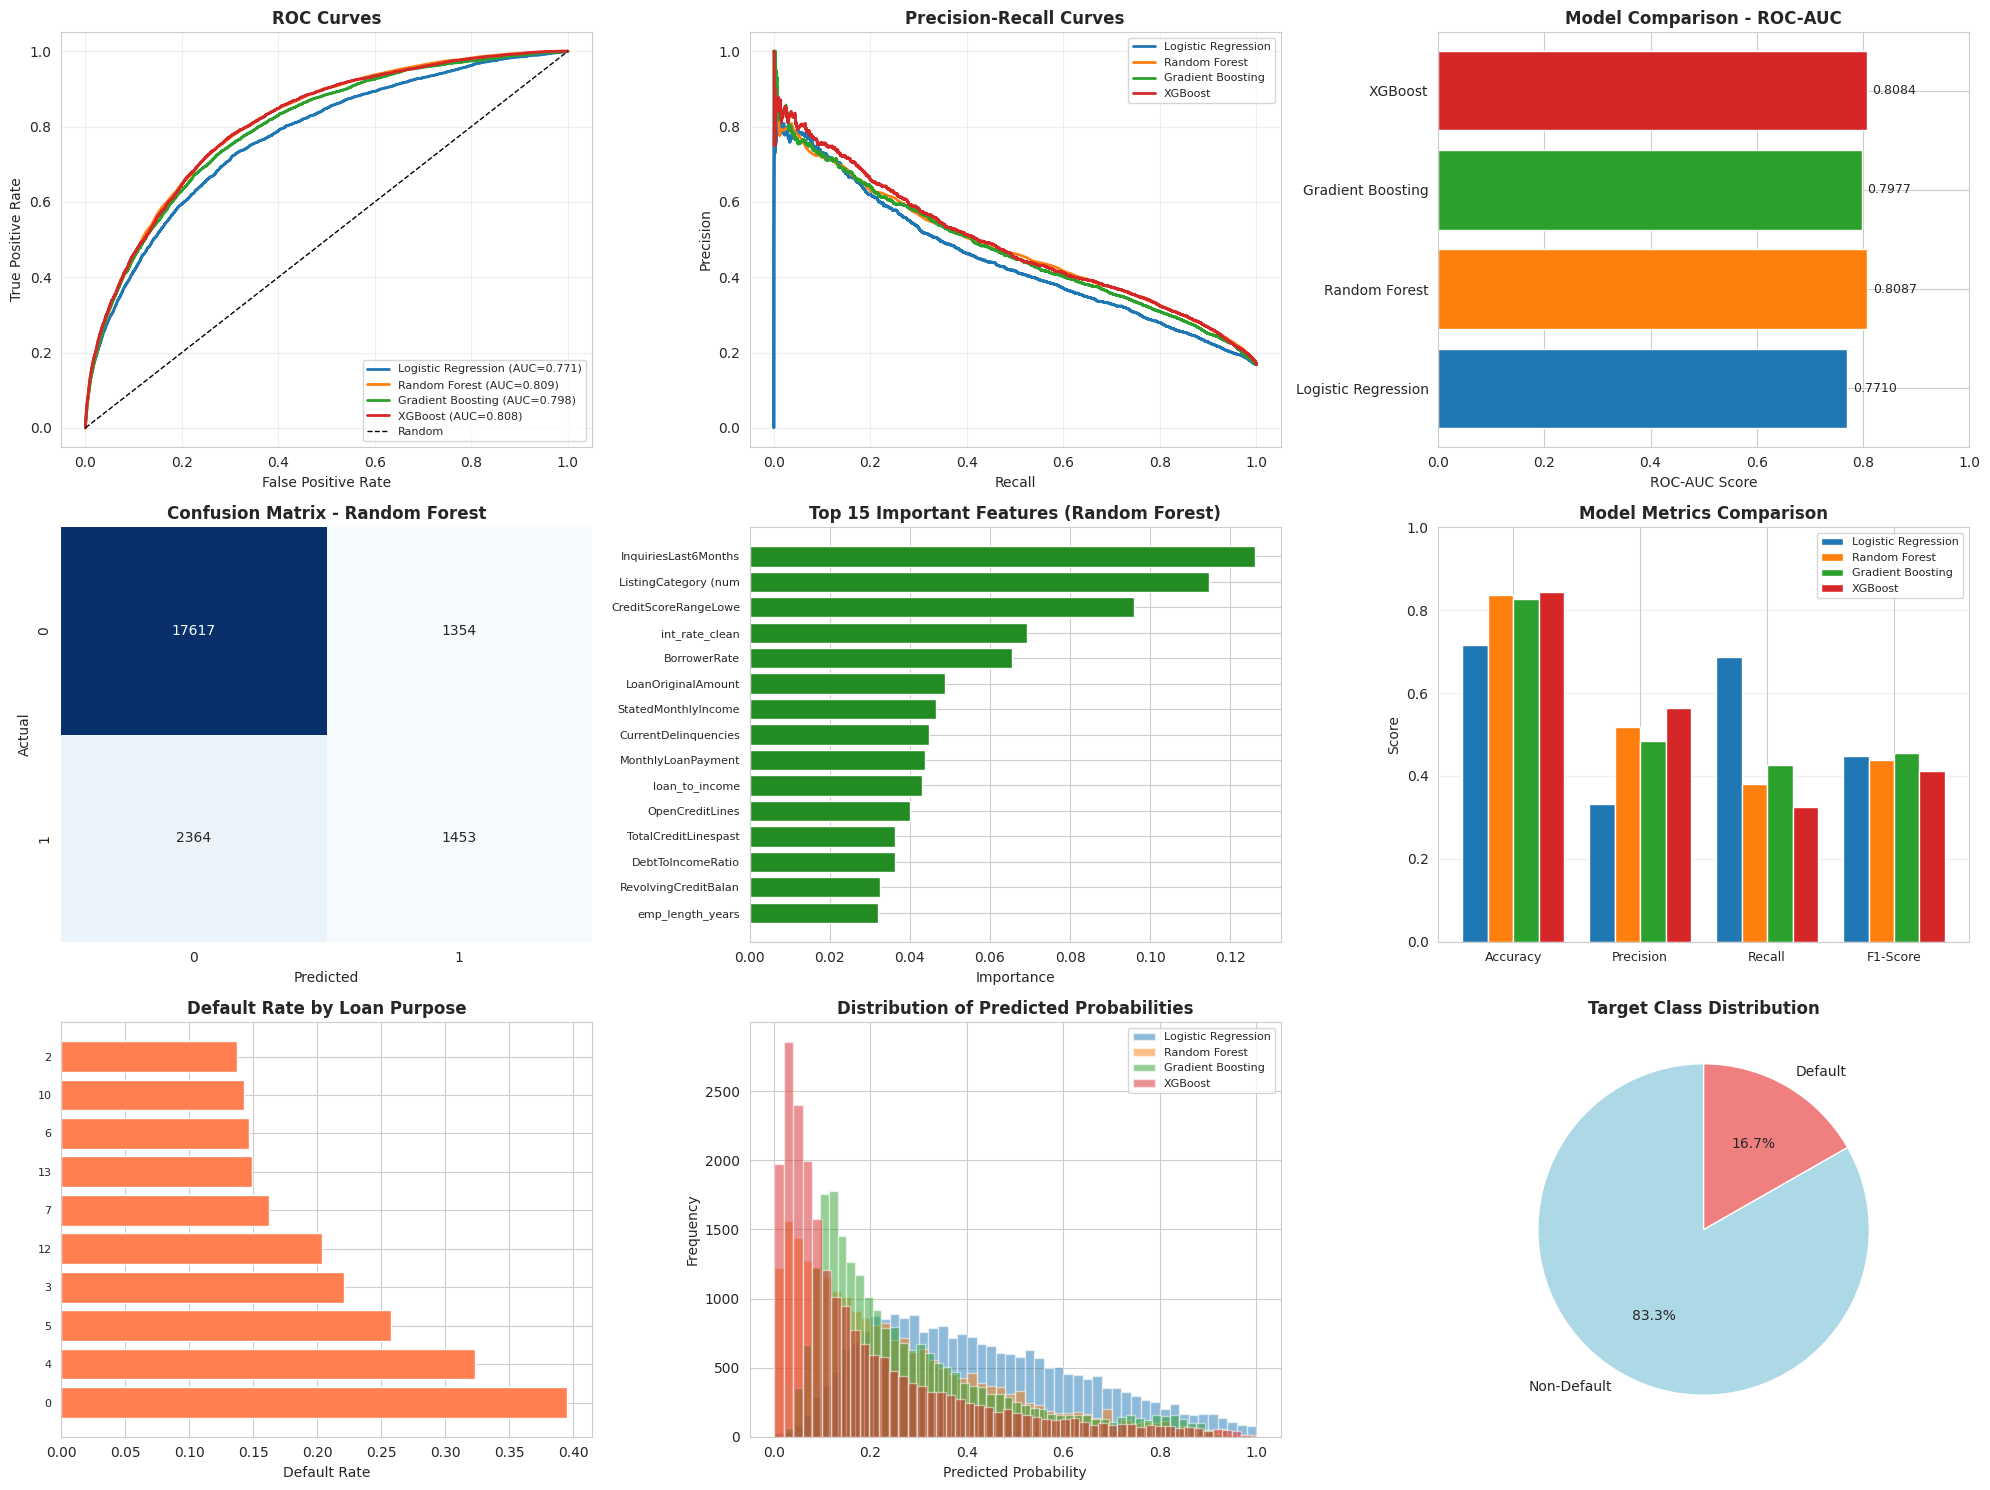


STEP 10: DETAILED CLASSIFICATION REPORTS

📊 Logistic Regression:
----------------------------------------------------------------------
              precision    recall  f1-score   support

 Non-Default       0.92      0.72      0.81     18971
     Default       0.33      0.69      0.45      3817

    accuracy                           0.72     22788
   macro avg       0.63      0.70      0.63     22788
weighted avg       0.82      0.72      0.75     22788


📊 Random Forest:
----------------------------------------------------------------------
              precision    recall  f1-score   support

 Non-Default       0.88      0.93      0.90     18971
     Default       0.52      0.38      0.44      3817

    accuracy                           0.84     22788
   macro avg       0.70      0.65      0.67     22788
weighted avg       0.82      0.84      0.83     22788


📊 Gradient Boosting:
----------------------------------------------------------------------
              precision    

In [ ]:
# ============================================
# COMPLETE P2P LENDING CREDIT RISK ANALYSIS
# For Google Colab
# ============================================

# Step 1: Install and Import Libraries
print("Installing required packages...")
!pip install -q pandas numpy scikit-learn matplotlib seaborn imbalanced-learn xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, precision_recall_curve,
                             accuracy_score, precision_score, recall_score, f1_score)
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully!\n")

# ============================================
# STEP 2: LOAD DATA
# ============================================

from google.colab import files

print("="*70)
print("STEP 1: UPLOAD YOUR LENDING DATA")
print("="*70)
print("Please upload your CSV or CSV.GZ file\n")

uploaded = files.upload()
filename = list(uploaded.keys())[0]

print(f"\n✓ File uploaded: {filename}")
print("Loading data...")

df = pd.read_csv(filename, low_memory=False)
print(f"✓ Data loaded: {df.shape[0]:,} rows, {df.shape[1]} columns\n")

# ============================================
# STEP 3: DATA EXPLORATION
# ============================================

print("="*70)
print("STEP 2: DATA EXPLORATION")
print("="*70)

print("\n📊 Dataset Overview:")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")
print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📋 Column Names (first 30):")
for i, col in enumerate(df.columns[:30], 1):
    print(f"   {i:2d}. {col}")

if len(df.columns) > 30:
    print(f"   ... and {len(df.columns) - 30} more columns")

print("\n🔍 Data Types:")
print(df.dtypes.value_counts())

print("\n📈 Missing Values (top 10):")
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing'] > 0].head(10))

# ============================================
# STEP 4: IDENTIFY TARGET VARIABLE
# ============================================

print("\n" + "="*70)
print("STEP 3: IDENTIFY TARGET VARIABLE (Loan Status)")
print("="*70)

# Common loan status column names
status_cols = ['loan_status', 'status', 'loan_state', 'loan_condition']
target_col = None

# Explicitly set target column based on previous analysis
if 'LoanStatus' in df.columns:
    target_col = 'LoanStatus'
    print(f"\n✓ Identified loan status column: '{target_col}'")
    print(f"\n📊 Loan Status Distribution:")
    print(df[target_col].value_counts())

    # Create binary target
    # Define default keywords based on observed values in 'LoanStatus'
    default_keywords = ['default', 'chargedoff', 'past due', 'cancelled']

    df['default'] = df[target_col].apply(
        lambda x: 1 if any(keyword in str(x).lower() for keyword in default_keywords) else 0
    )

    print(f"\n✓ Created binary target 'default':")
    print(f"   Non-Default (0): {(df['default']==0).sum():,} ({(df['default']==0).sum()/len(df)*100:.1f}%)")
    print(f"   Default (1): {(df['default']==1).sum():,} ({(df['default']==1).sum()/len(df)*100:.1f}%)")

else:
    print("⚠ Warning: Could not find loan status column automatically")
    print("\nPlease specify the column name for loan status:")
    print("Available columns:", df.columns.tolist()[:20])


# ============================================
# STEP 5: FEATURE ENGINEERING
# ============================================

print("\n" + "="*70)
print("STEP 4: FEATURE ENGINEERING")
print("="*70)

# Identify relevant columns
numeric_features = []
categorical_features = []

# Common P2P lending features
feature_mapping = {
    'loan_amount': ['loan_amnt', 'loan_amount', 'funded_amnt', 'funded_amnt_inv', 'LoanOriginalAmount'],
    'interest_rate': ['int_rate', 'interest_rate', 'BorrowerRate'],
    'annual_income': ['annual_inc', 'annual_income', 'StatedMonthlyIncome'], # Using stated monthly income as a proxy
    'dti': ['dti', 'debt_to_income', 'DebtToIncomeRatio'],
    'employment_length': ['emp_length', 'employment_length', 'EmploymentStatusDuration'],
    'home_ownership': ['home_ownership', 'IsBorrowerHomeowner'],
    'verification_status': ['verification_status', 'IncomeVerifiable'],
    'purpose': ['purpose', 'loan_purpose', 'ListingCategory (numeric)'],
    'credit_score': ['fico_range_low', 'fico_range_high', 'credit_score', 'CreditScoreRangeLower', 'CreditScoreRangeUpper'],
    'delinq_2yrs': ['delinq_2yrs', 'delinquencies_2yrs', 'CurrentDelinquencies'],
    'inq_last_6mths': ['inq_last_6mths', 'inquiries_last_6mths', 'InquiriesLast6Months'],
    'open_acc': ['open_acc', 'open_accounts', 'OpenCreditLines'],
    'pub_rec': ['pub_rec', 'public_records', 'PublicRecordsLast10Years'],
    'revol_bal': ['revol_bal', 'revolving_balance', 'RevolvingCreditBalance'],
    'revol_util': ['revol_util', 'revolving_utilization', 'BankcardUtilization'],
    'total_acc': ['total_acc', 'total_accounts', 'TotalCreditLinespast7years'],
    'installment': ['installment', 'MonthlyLoanPayment'],
    'term': ['term', 'Term']
}

# Find actual column names
actual_features = {}
for feature, possible_names in feature_mapping.items():
    for name in possible_names:
        if name in df.columns:
            actual_features[feature] = name
            break

print(f"✓ Identified {len(actual_features)} relevant features:\n")
for feature, col_name in actual_features.items():
    print(f"   • {feature}: {col_name}")

# Create derived features
print("\n📊 Creating derived features...")

# Ensure required columns exist before creating derived features
if 'loan_amount' in actual_features and 'annual_income' in actual_features:
    loan_amount_col = actual_features['loan_amount']
    annual_income_col = actual_features['annual_income']
    # Convert stated monthly income to annual income for calculation
    if annual_income_col == 'StatedMonthlyIncome':
         df['annual_income_calculated'] = df[annual_income_col] * 12
         annual_income_col = 'annual_income_calculated'

    df['loan_to_income'] = df[loan_amount_col] / df[annual_income_col].replace(0, np.nan)
    print("   ✓ loan_to_income ratio")


if 'interest_rate' in actual_features:
    rate_col = actual_features['interest_rate']
    if df[rate_col].dtype == 'object':
        df['int_rate_clean'] = df[rate_col].str.replace('%', '').str.strip().astype(float)
    else:
        df['int_rate_clean'] = df[rate_col]
    print("   ✓ cleaned interest rate")

if 'employment_length' in actual_features:
    emp_col = actual_features['employment_length']
    df['emp_length_years'] = df[emp_col].astype(str).str.extract('(\d+)').astype(float)
    df['emp_length_years'].fillna(0, inplace=True)
    print("   ✓ employment length in years")

if 'revol_util' in actual_features:
    util_col = actual_features['revol_util']
    if df[util_col].dtype == 'object':
        df['revol_util_clean'] = df[util_col].str.replace('%', '').str.strip().astype(float)
    else:
        df['revol_util_clean'] = df[util_col]
    print("   ✓ cleaned revolving utilization")

if 'term' in actual_features:
    df['term_months'] = df[actual_features['term']].astype(str).str.extract('(\d+)').astype(float)
    print("   ✓ loan term in months")


# ============================================
# STEP 6: DATA PREPROCESSING
# ============================================

print("\n" + "="*70)
print("STEP 5: DATA PREPROCESSING")
print("="*70)

# Select features for modeling
feature_cols = list(actual_features.values())
derived_cols = ['loan_to_income', 'int_rate_clean', 'emp_length_years',
                'revol_util_clean', 'term_months']
derived_cols = [col for col in derived_cols if col in df.columns]

all_feature_cols = feature_cols + derived_cols
all_feature_cols = [col for col in all_feature_cols if col in df.columns]

# Create modeling dataset
model_cols = all_feature_cols + ['default']
df_model = df[model_cols].copy()

# Remove rows with missing target
df_model = df_model[df_model['default'].notna()]

print(f"\n✓ Dataset after removing missing targets: {df_model.shape}")

# Separate numeric and categorical
numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
if 'default' in numeric_cols:
    numeric_cols.remove('default')

categorical_cols = df_model.select_dtypes(include=['object', 'bool']).columns.tolist() # Include bool for categorical

print(f"\n📊 Feature Types:")
print(f"   Numeric features: {len(numeric_cols)}")
print(f"   Categorical features: {len(categorical_cols)}")

# Handle missing values
print("\n🔧 Handling missing values...")

for col in numeric_cols:
    if df_model[col].isnull().sum() > 0:
        median_val = df_model[col].median()
        df_model[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    if df_model[col].isnull().sum() > 0:
        df_model[col].fillna('Unknown', inplace=True)

print("   ✓ Missing values handled")

# Encode categorical variables
print("\n🔤 Encoding categorical variables...")

le_dict = {}
encoded_categorical_cols = []
for col in categorical_cols:
    try:
        le = LabelEncoder()
        df_model[col + '_encoded'] = le.fit_transform(df_model[col].astype(str))
        le_dict[col] = le
        encoded_categorical_cols.append(col + '_encoded')
        print(f"   ✓ {col}: {len(le.classes_)} categories")
    except Exception as e:
        print(f"   ⚠ Could not encode {col}: {e}")
        # If encoding fails, potentially drop the column or handle differently
        # For now, just skip and warn

# Create final feature matrix
X_cols = numeric_cols + encoded_categorical_cols
X = df_model[X_cols]
y = df_model['default']

print(f"\n✓ Final feature matrix: {X.shape}")
print(f"✓ Target distribution: {y.value_counts().to_dict()}")

# ============================================
# STEP 7: TRAIN-TEST SPLIT
# ============================================

print("\n" + "="*70)
print("STEP 6: TRAIN-TEST SPLIT")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Training set: {X_train.shape}")
print(f"✓ Test set: {X_test.shape}")
print(f"\n📊 Class distribution in training set:")
print(f"   Non-Default: {(y_train==0).sum():,} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"   Default: {(y_train==1).sum():,} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")

# Feature scaling
print("\n⚖️ Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("   ✓ Features scaled")

# Handle class imbalance with SMOTE
print("\n⚖️ Handling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print(f"   ✓ After SMOTE: {X_train_balanced.shape}")
print(f"   Non-Default: {(y_train_balanced==0).sum():,}")
print(f"   Default: {(y_train_balanced==1).sum():,}")

# ============================================
# STEP 8: MODEL TRAINING
# ============================================

print("\n" + "="*70)
print("STEP 7: MODEL TRAINING")
print("="*70)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    # Train model
    model.fit(X_train_balanced, y_train_balanced)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

    print(f"   ✓ Accuracy:  {accuracy:.4f}")
    print(f"   ✓ Precision: {precision:.4f}")
    print(f"   ✓ Recall:    {recall:.4f}")
    print(f"   ✓ F1-Score:  {f1:.4f}")
    print(f"   ✓ ROC-AUC:   {roc_auc:.4f}")

# ============================================
# STEP 9: MODEL COMPARISON
# ============================================

print("\n" + "="*70)
print("STEP 8: MODEL COMPARISON")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()]
})

comparison_df = comparison_df.round(4)
print("\n📊 Model Performance Summary:")
print(comparison_df.to_string(index=False))

best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model_name}")

# ============================================
# STEP 10: VISUALIZATIONS
# ============================================

print("\n" + "="*70)
print("STEP 9: VISUALIZATIONS")
print("="*70)

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 15))

# 1. ROC Curves
ax1 = plt.subplot(3, 3, 1)
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    ax1.plot(fpr, tpr, label=f"{name} (AUC={result['roc_auc']:.3f})", linewidth=2)
ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax1.set_xlabel('False Positive Rate', fontsize=10)
ax1.set_ylabel('True Positive Rate', fontsize=10)
ax1.set_title('ROC Curves', fontsize=12, fontweight='bold')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. Precision-Recall Curves
ax2 = plt.subplot(3, 3, 2)
for name, result in results.items():
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, result['probabilities'])
    ax2.plot(recall_curve, precision_curve, label=name, linewidth=2)
ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Precision-Recall Curves', fontsize=12, fontweight='bold')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

# 3. Model Comparison - ROC-AUC
ax3 = plt.subplot(3, 3, 3)
models_list = list(results.keys())
roc_scores = [results[m]['roc_auc'] for m in models_list]
bars = ax3.barh(models_list, roc_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax3.set_xlabel('ROC-AUC Score', fontsize=10)
ax3.set_title('Model Comparison - ROC-AUC', fontsize=12, fontweight='bold')
ax3.set_xlim([0, 1])
for i, v in enumerate(roc_scores):
    ax3.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

# 4. Confusion Matrix - Best Model
ax4 = plt.subplot(3, 3, 4)
cm = confusion_matrix(y_test, results[best_model_name]['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4, cbar=False)
ax4.set_title(f'Confusion Matrix - {best_model_name}', fontsize=12, fontweight='bold')
ax4.set_ylabel('Actual', fontsize=10)
ax4.set_xlabel('Predicted', fontsize=10)

# 5. Feature Importance (Random Forest)
ax5 = plt.subplot(3, 3, 5)
if 'Random Forest' in results:
    importances = results['Random Forest']['model'].feature_importances_
    # Ensure X_cols is available and matches the trained model's features
    if len(X_cols) == len(importances):
        indices = np.argsort(importances)[-15:]
        feature_names = [X_cols[i] for i in indices]
        ax5.barh(range(len(indices)), importances[indices], color='forestgreen')
        ax5.set_yticks(range(len(indices)))
        ax5.set_yticklabels([fn[:20] for fn in feature_names], fontsize=8)
        ax5.set_xlabel('Importance', fontsize=10)
        ax5.set_title('Top 15 Important Features (Random Forest)', fontsize=12, fontweight='bold')
    else:
        ax5.text(0.5, 0.5, "Feature importance not available\ndue to feature mismatch",
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=10, color='gray')
        ax5.set_title('Feature Importance (Random Forest)', fontsize=12, fontweight='bold')


# 6. Model Metrics Comparison
ax6 = plt.subplot(3, 3, 6)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.2
for i, model_name in enumerate(results.keys()):
    values = [results[model_name]['accuracy'], results[model_name]['precision'],
              results[model_name]['recall'], results[model_name]['f1']]
    ax6.bar(x + i*width, values, width, label=model_name)
ax6.set_ylabel('Score', fontsize=10)
ax6.set_title('Model Metrics Comparison', fontsize=12, fontweight='bold')
ax6.set_xticks(x + width * 1.5)
ax6.set_xticklabels(metrics, fontsize=9)
ax6.legend(fontsize=8)
ax6.set_ylim([0, 1])
ax6.grid(True, alpha=0.3, axis='y')

# 7. Default Rate by Feature (if available)
ax7 = plt.subplot(3, 3, 7)
if 'purpose' in actual_features:
    purpose_col = actual_features['purpose']
    if purpose_col in df_model.columns: # Check if the original column is in the model dataframe
        purpose_default = df_model.groupby(purpose_col)['default'].mean().sort_values(ascending=False).head(10)
        ax7.barh(range(len(purpose_default)), purpose_default.values, color='coral')
        ax7.set_yticks(range(len(purpose_default)))
        # Convert index to string before slicing
        ax7.set_yticklabels([str(p)[:20] for p in purpose_default.index], fontsize=8)
        ax7.set_xlabel('Default Rate', fontsize=10)
        ax7.set_title('Default Rate by Loan Purpose', fontsize=12, fontweight='bold')
    else:
        ax7.text(0.5, 0.5, f"'{purpose_col}' not available in model data",
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=10, color='gray')
        ax7.set_title('Default Rate by Loan Purpose', fontsize=12, fontweight='bold')
else:
     ax7.text(0.5, 0.5, "'purpose' feature not identified",
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=10, color='gray')
     ax7.set_title('Default Rate by Loan Purpose', fontsize=12, fontweight='bold')


# 8. Distribution of Predicted Probabilities
ax8 = plt.subplot(3, 3, 8)
for name in results.keys():
    proba = results[name]['probabilities']
    ax8.hist(proba, bins=50, alpha=0.5, label=name)
ax8.set_xlabel('Predicted Probability', fontsize=10)
ax8.set_ylabel('Frequency', fontsize=10)
ax8.set_title('Distribution of Predicted Probabilities', fontsize=12, fontweight='bold')
ax8.legend(fontsize=8)

# 9. Class Distribution
ax9 = plt.subplot(3, 3, 9)
if 'default' in df_model.columns:
    class_dist = df_model['default'].value_counts()
    ax9.pie(class_dist.values, labels=['Non-Default', 'Default'], autopct='%1.1f%%',
            colors=['lightblue', 'lightcoral'], startangle=90)
    ax9.set_title('Target Class Distribution', fontsize=12, fontweight='bold')
else:
     ax9.text(0.5, 0.5, "'default' column not found",
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=10, color='gray')
     ax9.set_title('Target Class Distribution', fontsize=12, fontweight='bold')


plt.tight_layout()
plt.savefig('credit_risk_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualizations saved as 'credit_risk_analysis.png'")
plt.show()

# ============================================
# STEP 11: DETAILED CLASSIFICATION REPORT
# ============================================

print("\n" + "="*70)
print("STEP 10: DETAILED CLASSIFICATION REPORTS")
print("="*70)

for name in results.keys():
    print(f"\n📊 {name}:")
    print("-" * 70)
    print(classification_report(y_test, results[name]['predictions'],
                               target_names=['Non-Default', 'Default']))

# ============================================
# STEP 12: BUSINESS INSIGHTS
# ============================================

print("\n" + "="*70)
print("STEP 11: BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*70)

best_model = results[best_model_name]['model']
best_proba = results[best_model_name]['probabilities']

# Calculate expected loss
if 'default' in df_model.columns:
    default_rate = df_model['default'].mean() # Calculate overall default rate from the model data
    print(f"\n📈 Key Metrics:")
    print(f"   • Overall Default Rate (in modeling data): {default_rate:.2%}")
    print(f"   • Best Model: {best_model_name}")
    print(f"   • ROC-AUC Score: {results[best_model_name]['roc_auc']:.4f}")

    # Risk segmentation
    risk_bins = pd.cut(best_proba, bins=[0, 0.3, 0.6, 1.0], labels=['Low Risk', 'Medium Risk', 'High Risk'])
    risk_summary = pd.DataFrame({
        'Risk Segment': risk_bins,
        'Actual Default': y_test
    }).groupby('Risk Segment')['Actual Default'].agg(['count', 'sum', 'mean'])
    risk_summary.columns = ['Total Loans', 'Defaults', 'Default Rate']
    risk_summary['Default Rate'] = risk_summary['Default Rate'].apply(lambda x: f"{x:.2%}")

    print(f"\n🎯 Risk Segmentation:")
    print(risk_summary)

    print(f"\n💡 Recommendations:")
    print("   1. Implement risk-based pricing using the model scores")
    print("   2. Set approval thresholds based on risk tolerance")
    print("   3. Monitor high-risk segments more closely")
    print("   4. Consider additional verification for medium-risk applicants")
else:
    print("\n📈 Key Metrics:")
    print("   • Overall Default Rate: Not available (default column not found)")
    print(f"   • Best Model: {best_model_name}")
    print(f"   • ROC-AUC Score: {results[best_model_name]['roc_auc']:.4f}")
    print("\nRisk segmentation and recommendations are based on the best model, but overall default rate could not be calculated.")


# Top features
if 'Random Forest' in results:
    importances = results['Random Forest']['model'].feature_importances_
     # Ensure X_cols is available and matches the trained model's features
    if len(X_cols) == len(importances):
        top_indices = np.argsort(importances)[-5:]
        print(f"\n🔑 Top 5 Most Important Features:")
        for i, idx in enumerate(reversed(top_indices), 1):
            print(f"   {i}. {X_cols[idx]}: {importances[idx]:.4f}")
    else:
         print("\n🔑 Top 5 Most Important Features: Not available (feature mismatch)")

print("\n" + "="*70)
print("✓ ANALYSIS COMPLETE!")
print("="*70)
print("\n📊 Summary:")
print(f"   • Models trained: {len(results)}")
print(f"   • Best model: {best_model_name}")
print(f"   • ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")
print(f"   • Accuracy: {results[best_model_name]['accuracy']:.4f}")
print("\n✓ All visualizations and reports have been generated!")